In [1]:
#importing necessary libraries for data pre-processing and EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import datetime
import plotly.express as px
import plotly.graph_objects as go
import warnings

In [2]:
warnings.filterwarnings("ignore")
df=pd.read_csv('dataset.csv')  #reading the csv file
pd.set_option('display.max_columns', None)

In [3]:
df.head()  #to view the first 5 rows

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,NaN,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
df.shape

(1000, 40)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [6]:
df.isnull().sum()  #checking for null values in each column

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [7]:
#the column '_c39' has all the rows with null values. the column is dropped
df.drop(['_c39'],axis=1,inplace=True)

In [8]:
#converting the policy_bind_date & incident_date columns to date
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])
df['incident_date']=pd.to_datetime(df['incident_date'])

In [9]:
#we will create another column to determine the age of the motor
df['auto_age']=datetime.datetime.now().year-df['auto_year']

In [10]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
months_as_customer,1000.0,203.954,0.0,115.75,199.5,276.25,479.0,115.113174
age,1000.0,38.948,19.0,32.0,38.0,44.0,64.0,9.140287
policy_number,1000.0,546238.648,100804.0,335980.25,533135.0,759099.75,999435.0,257063.005276
policy_bind_date,1000,2002-02-08 04:40:47.999999872,1990-01-08 00:00:00,1995-09-19 00:00:00,2002-04-01 12:00:00,2008-04-21 12:00:00,2015-02-22 00:00:00,NaN
policy_deductable,1000.0,1136.0,500.0,500.0,1000.0,2000.0,2000.0,611.864673
policy_annual_premium,1000.0,1256.40615,433.33,1089.6075,1257.2,1415.695,2047.59,244.167395
umbrella_limit,1000.0,1101000.0,-1000000.0,0.0,0.0,0.0,10000000.0,2297406.598118
insured_zip,1000.0,501214.488,430104.0,448404.5,466445.5,603251.0,620962.0,71701.610941
capital-gains,1000.0,25126.1,0.0,0.0,0.0,51025.0,100500.0,27872.187708
capital-loss,1000.0,-26793.7,-111100.0,-51500.0,-23250.0,0.0,0.0,28104.096686


In [11]:
df.nunique()


months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             4
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

**Performing some EDA**


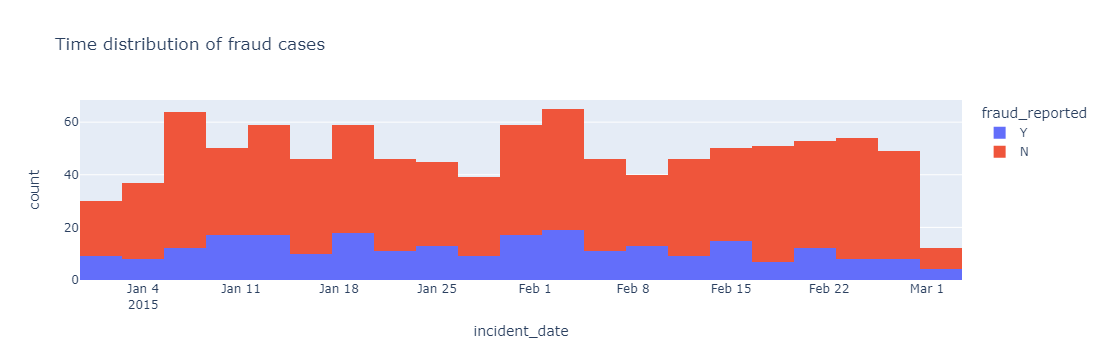

In [18]:
#plotting a histogram to check the time distribution of fraud cases
px.histogram(df,x='incident_date',color='fraud_reported',title = 'Time distribution of fraud cases')

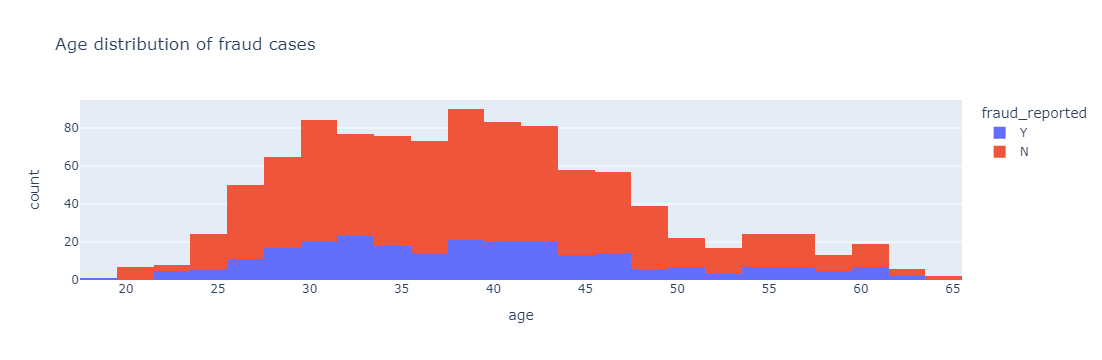

In [19]:
#histogram to check Age distribution of fraud cases
px.histogram(df,x='age',color='fraud_reported', title = 'Age distribution of fraud cases')

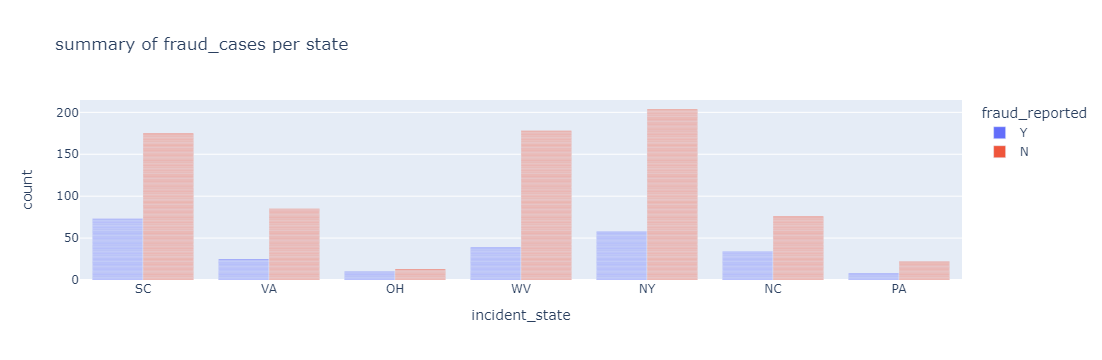

In [20]:
#summary of fraud_cases per state
px.bar(df, x='incident_state',color='fraud_reported',
             barmode='group', title='summary of fraud_cases per state')

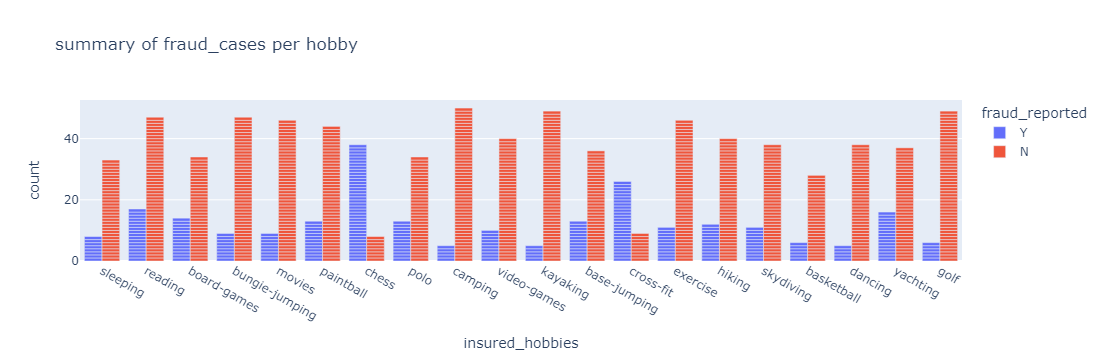

In [21]:
#summary of fraud_cases per hobby
px.bar(df, x='insured_hobbies',color='fraud_reported',
             barmode='group', title='summary of fraud_cases per hobby')

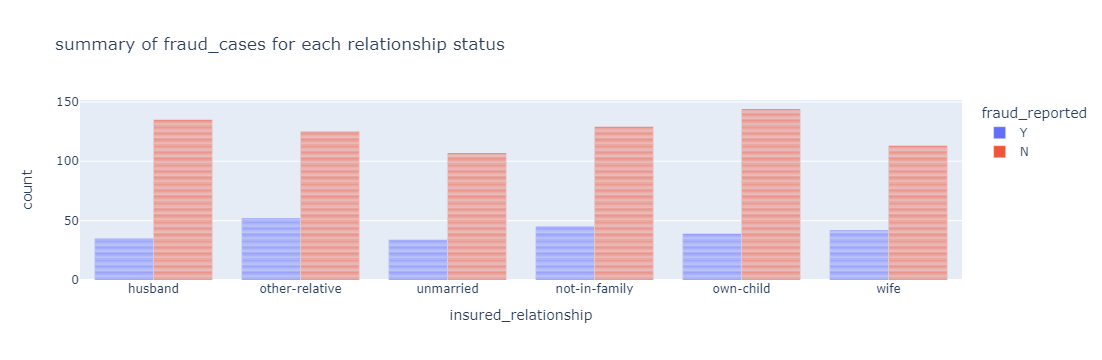

In [23]:
#summary of fraud_cases for relationship status
px.bar(df, x='insured_relationship',color='fraud_reported',
             barmode='group', title='summary of fraud_cases for each relationship status')

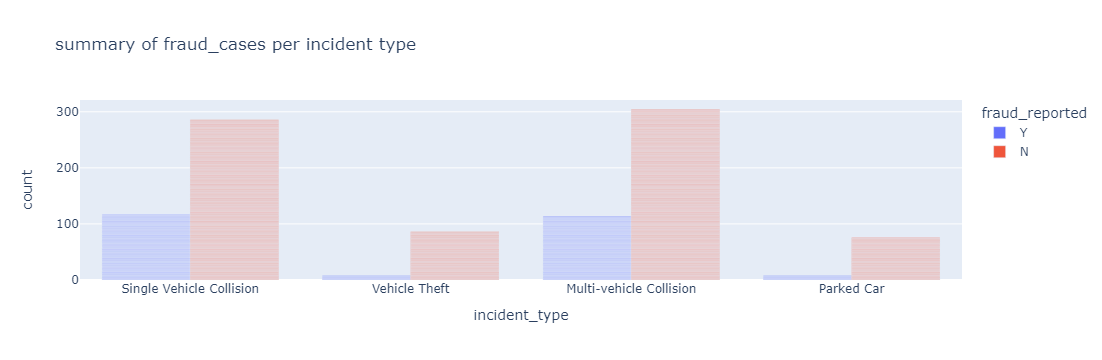

In [31]:
#summary of fraud_cases per incident type
px.bar(df, x='incident_type',color='fraud_reported',
             barmode='group', title='summary of fraud_cases per incident type')

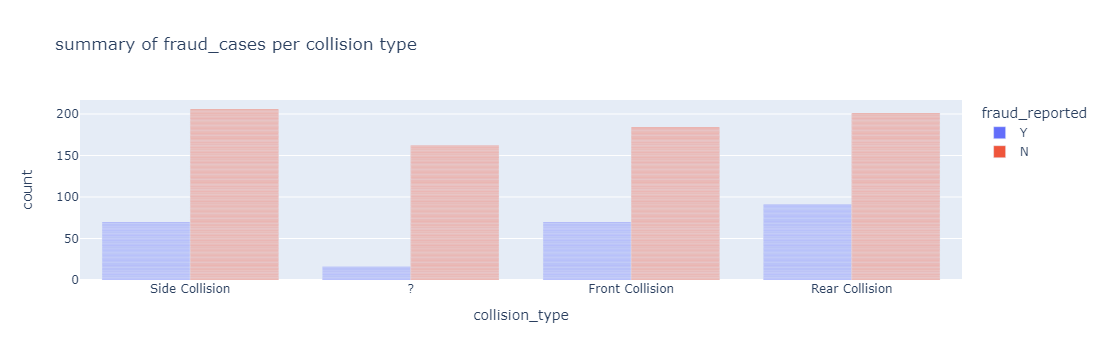

In [32]:
#summary of fraud_cases per incident type
px.bar(df, x='collision_type',color='fraud_reported',
             barmode='group', title='summary of fraud_cases per collision type')

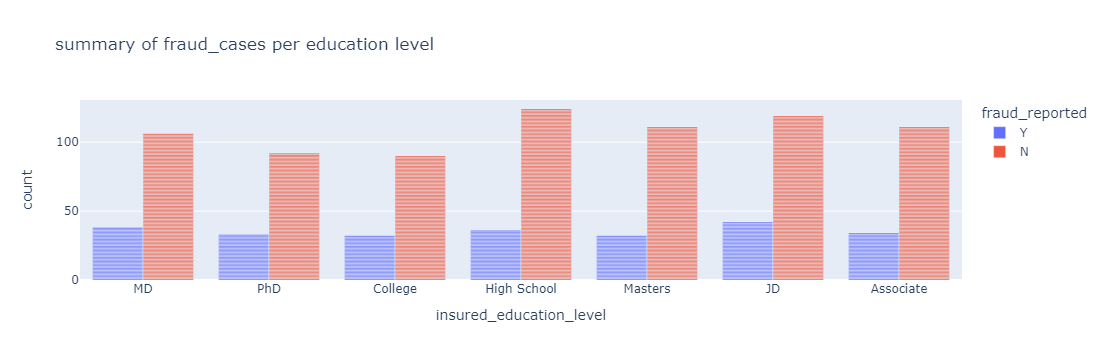

In [33]:
#summary of fraud_cases per education level
px.bar(df, x='insured_education_level',color='fraud_reported',
             barmode='group', title='summary of fraud_cases per education level')

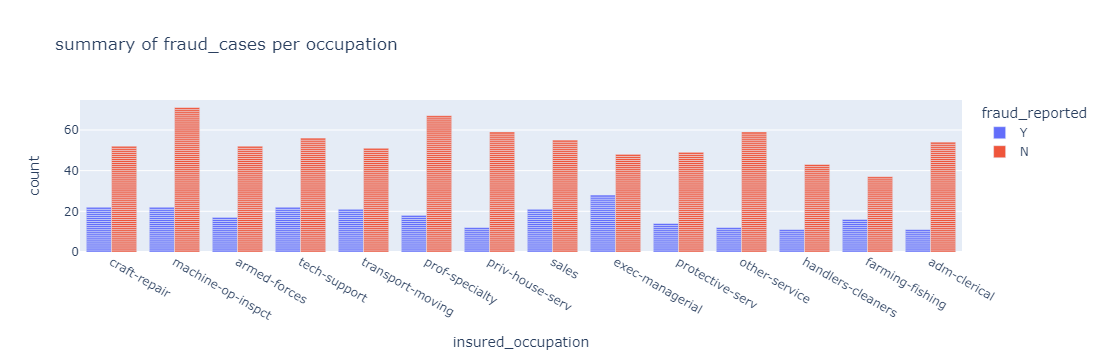

In [34]:
#summary of fraud_cases per occupation
px.bar(df, x='insured_occupation',color='fraud_reported',
             barmode='group', title='summary of fraud_cases per occupation')

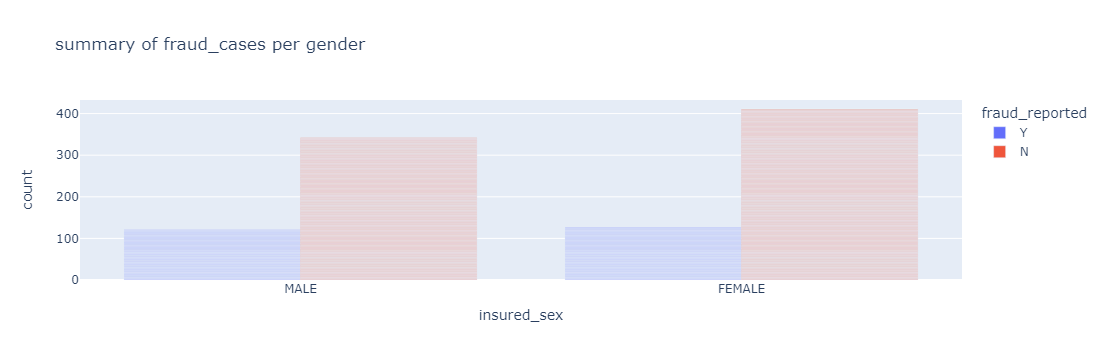

In [35]:
#summary of fraud_cases per gender
px.bar(df, x='insured_sex',color='fraud_reported',
             barmode='group', title='summary of fraud_cases per gender')

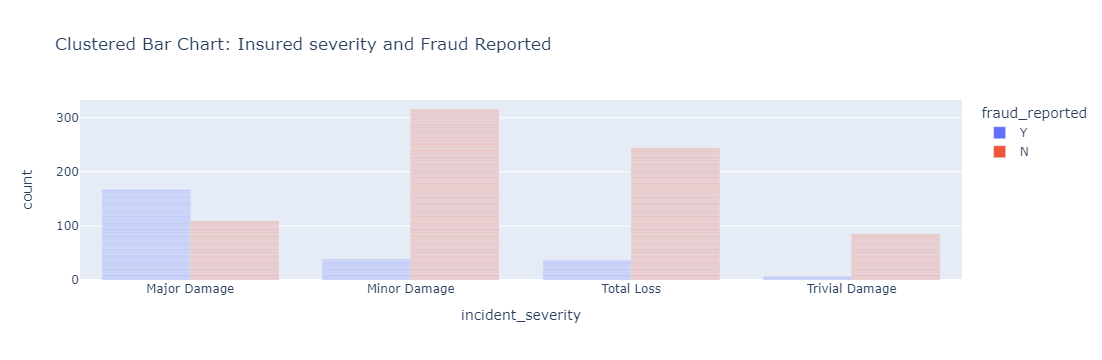

In [29]:
px.bar(df, x='incident_severity',color='fraud_reported',
             barmode='group', title='Clustered Bar Chart: Insured severity and Fraud Reported')

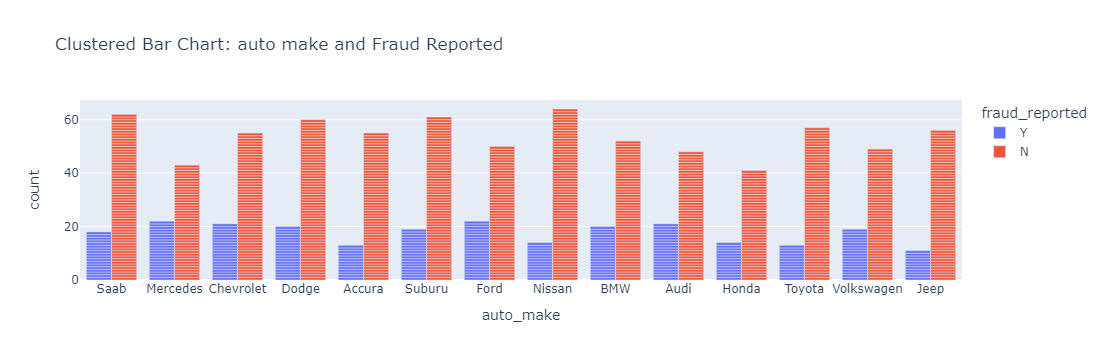

In [30]:
px.bar(df, x='auto_make',color='fraud_reported',
             barmode='group', title='Clustered Bar Chart: auto make and Fraud Reported')

# **Summary**

# ***from the above EDA, below conclusion can be made.***

**Incident Date Distribution:**
Fraud cases were slightly higher in January and February compared to other months.

**Insured Age Distribution:**
Higher case counts were observed among individuals aged 30-35 and 38-43.

**Incident State**:
The states of South Carolina (SC) and New York (NY) reported the most cases.
Ohio (OH) and Pennsylvania (PA) had the fewest cases.

**Insured Hobbies:**
Chess enthusiasts had the highest number of cases.
Cross-fit enthusiasts followed closely.
Camping and kayaking enthusiasts reported fewer cases.

**Insured Relationship:**
There was a fairly even distribution of cases across insured relationships.
"Not in family" and "other relative" had slightly more cases.

**Incident Type:**
Single vehicle collision and multi-vehicle collision reported higher case counts.
Vehicle theft and parked car incidents had fewer cases.

**Collision Type:**
Rear collision, front collision, and side collision were the most common, in that order.
"Unknown" collision type had fewer cases.

**Insured Education Level:**
An almost equal distribution of cases was observed across different education levels.
Individuals with a JD degree had slightly more cases.

**Insured Sex:**
Cases were evenly distributed among insured sexes.

**Insured Severity:**
Major damage incidents had the highest number of cases.
Minor and total damage had approximately equal case counts.
Trivial damage had the fewest cases.

further research to be done on possible causes of high incidences

In [41]:
cat_df=df.select_dtypes(include='object')

In [42]:
cat_df.head()

,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,OH,250/500,MALE,MD,craft-repair,sleeping,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,YES,YES,Saab,92x,Y
1,IN,250/500,MALE,MD,machine-op-inspct,reading,other-relative,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,?,?,Mercedes,E400,Y
2,OH,100/300,FEMALE,PhD,sales,board-games,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,NO,NO,Dodge,RAM,N
3,IL,250/500,FEMALE,PhD,armed-forces,board-games,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,?,NO,Chevrolet,Tahoe,Y
4,IL,500/1000,MALE,Associate,sales,board-games,unmarried,Vehicle Theft,?,Minor Damage,NaN,NY,Arlington,3041 3rd Ave,NO,NO,Accura,RSX,N


In [43]:
cat_df.nunique()

policy_state                  3
policy_csl                    3
insured_sex                   2
insured_education_level       7
insured_occupation           14
insured_hobbies              20
insured_relationship          6
incident_type                 4
collision_type                4
incident_severity             4
authorities_contacted         4
incident_state                7
incident_city                 7
incident_location          1000
property_damage               3
police_report_available       3
auto_make                    14
auto_model                   39
fraud_reported                2
dtype: int64

In [44]:
#we will drop the incident location and the insured sex columns
cat_df.drop(['incident_location', 'insured_sex'],axis=1,inplace=True)

In [40]:
cat_df_encoded.shape

(1000, 1127)

In [45]:
#conducting chi sqaure on the categorical columns to establish relationship with the target variable
from scipy.stats import chi2_contingency
def chi_square_test(df):
  results = []
  for col in cat_df.columns:
    contingency_table = pd.crosstab(cat_df[col], cat_df['fraud_reported'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    results.append((col,chi2, p, dof, expected))
    results_df = pd.DataFrame(results, columns=['column','chi2', 'p', 'dof', 'expected'])
  return results_df

In [46]:
results=chi_square_test(cat_df)
results

,column,chi2,p,dof,expected
0,policy_state,1.022879,5.996317e-01,2,"[[254.514, 83.486], [233.43, 76.57], [265.056,..."
1,policy_csl,2.136999,3.435237e-01,2,"[[262.797, 86.203], [264.303, 86.697], [225.9,..."
2,insured_education_level,1.688227,9.460265e-01,6,"[[109.185, 35.815], [91.866, 30.134], [120.48,..."
3,insured_occupation,17.659340,1.708876e-01,13,"[[48.945, 16.055], [51.957, 17.043], [55.722, ..."
4,insured_hobbies,162.315399,8.989147e-25,19,"[[36.897, 12.103], [25.602, 8.398], [36.144, 1..."
5,insured_relationship,5.389248,3.702431e-01,5,"[[128.01, 41.99], [131.022, 42.978], [133.281,..."
6,incident_type,29.131540,2.101334e-06,3,"[[315.507, 103.493], [63.252, 20.748], [303.45..."
7,collision_type,31.365781,7.118898e-07,3,"[[134.034, 43.966], [191.262, 62.738], [219.87..."
8,incident_severity,264.237350,5.447034e-57,3,"[[207.828, 68.172], [266.562, 87.438], [210.84..."
9,authorities_contacted,8.279563,4.057387e-02,3,"[[144.03520352035204, 51.964796479647966], [16..."


In [47]:
#columns that do not have a relationship with the target column
cols_to_drop = results[results['p'] > 0.05]
cols_to_drop

,column,chi2,p,dof,expected
0,policy_state,1.022879,0.599632,2,"[[254.514, 83.486], [233.43, 76.57], [265.056,..."
1,policy_csl,2.136999,0.343524,2,"[[262.797, 86.203], [264.303, 86.697], [225.9,..."
2,insured_education_level,1.688227,0.946027,6,"[[109.185, 35.815], [91.866, 30.134], [120.48,..."
3,insured_occupation,17.659340,0.170888,13,"[[48.945, 16.055], [51.957, 17.043], [55.722, ..."
5,insured_relationship,5.389248,0.370243,5,"[[128.01, 41.99], [131.022, 42.978], [133.281,..."
11,incident_city,2.610518,0.855900,6,"[[114.456, 37.544], [112.197, 36.803], [106.17..."
13,police_report_available,0.841604,0.656520,2,"[[258.279, 84.721], [258.279, 84.721], [236.44..."
14,auto_make,13.775924,0.389812,13,"[[51.204, 16.796], [51.957, 17.043], [54.216, ..."
15,auto_model,46.658170,0.158265,38,"[[13.554, 4.446], [21.084, 6.916], [18.825, 6...."


In [48]:
#dropping the irrelevant cat columns
cat_df.drop(['policy_state','policy_csl','insured_education_level','insured_occupation','insured_relationship','incident_city',
                          'police_report_available','auto_make','auto_model'],axis=1,inplace=True)

In [49]:
cat_df.head()

,insured_hobbies,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,property_damage,fraud_reported
0,sleeping,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,YES,Y
1,reading,Vehicle Theft,?,Minor Damage,Police,VA,?,Y
2,board-games,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,NO,N
3,board-games,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,?,Y
4,board-games,Vehicle Theft,?,Minor Damage,NaN,NY,NO,N


In [50]:
print(cat_df['collision_type'].value_counts())
print(cat_df['property_damage'].value_counts())

collision_type
Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: count, dtype: int64
property_damage
?      360
NO     338
YES    302
Name: count, dtype: int64


In [51]:
#replacing the unknown collision type and property damage with 'other'
cat_df['collision_type']=cat_df['collision_type'].replace('?','other')
cat_df['property_damage']=cat_df['property_damage'].replace('?','other')

In [52]:
#dropping the frau_reported column from the cat_df and encoding the df
cat_df.drop(['fraud_reported'],axis=1,inplace=True)
cat_df_encoded = pd.get_dummies(cat_df, drop_first=True).astype(int)
cat_df_encoded.head()

,insured_hobbies_basketball,insured_hobbies_board-games,insured_hobbies_bungie-jumping,insured_hobbies_camping,insured_hobbies_chess,insured_hobbies_cross-fit,insured_hobbies_dancing,insured_hobbies_exercise,insured_hobbies_golf,insured_hobbies_hiking,insured_hobbies_kayaking,insured_hobbies_movies,insured_hobbies_paintball,insured_hobbies_polo,insured_hobbies_reading,insured_hobbies_skydiving,insured_hobbies_sleeping,insured_hobbies_video-games,insured_hobbies_yachting,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,collision_type_other,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,property_damage_YES,property_damage_other
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [53]:
#encoding the target variable
df['fraud_reported']=df['fraud_reported'].map({'Y':1,'N':0})

In [54]:
num_df = df.select_dtypes(include=['number'])

In [56]:
num_df.head()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,auto_age
0,328,48,521585,1000,1406.91,0,466132,53300,0,5,1,1,2,71610,6510,13020,52080,2004,1,20
1,228,42,342868,2000,1197.22,5000000,468176,0,0,8,1,0,0,5070,780,780,3510,2007,1,17
2,134,29,687698,2000,1413.14,5000000,430632,35100,0,7,3,2,3,34650,7700,3850,23100,2007,0,17
3,256,41,227811,2000,1415.74,6000000,608117,48900,-62400,5,1,1,2,63400,6340,6340,50720,2014,1,10
4,228,44,367455,1000,1583.91,6000000,610706,66000,-46000,20,1,0,1,6500,1300,650,4550,2009,0,15


In [57]:
#converting the target variable to numeric to conduct a t-test
num_df['fraud_reported']=num_df['fraud_reported'].map({1:'Y',0:'N'})

In [58]:
from scipy import stats

target_variable = 'fraud_reported'
group_1 = num_df[num_df[target_variable] == 'N']
group_2 = num_df[num_df[target_variable] == 'Y']

t_test_results = []

for column in num_df.columns:
    if column != target_variable:  # Skip the target variable itself
        t_stat, p_value = stats.ttest_ind(group_1[column], group_2[column], equal_var=False)
        t_test_results.append({'Feature': column, 'T-Statistic': t_stat, 'P-Value': p_value})

t_test_df = pd.DataFrame(t_test_results)

alpha = 0.05
significant_results = t_test_df[t_test_df['P-Value'] < alpha]

# Print the results
print("T-Test Results:")
print(t_test_df)
print("\nSignificant Results (p < 0.05):")
print(significant_results)


T-Test Results:
                        Feature  T-Statistic       P-Value
0            months_as_customer    -0.631767  5.278993e-01
1                           age    -0.369827  7.117098e-01
2                 policy_number     0.932356  3.516877e-01
3             policy_deductable    -0.460021  6.457465e-01
4         policy_annual_premium     0.446356  6.555803e-01
5                umbrella_limit    -1.751036  8.074098e-02
6                   insured_zip    -0.619116  5.361698e-01
7                 capital-gains     0.607477  5.438618e-01
8                  capital-loss     0.475394  6.347485e-01
9      incident_hour_of_the_day    -0.137225  8.909182e-01
10  number_of_vehicles_involved    -1.608588  1.084838e-01
11              bodily_injuries    -1.061888  2.889066e-01
12                    witnesses    -1.607691  1.086220e-01
13           total_claim_amount    -6.035780  2.901133e-09
14                 injury_claim    -3.014894  2.715165e-03
15               property_claim    -4.49

In [59]:
cols_to_drop = t_test_df[t_test_df['P-Value'] > alpha]['Feature'].tolist()
cols_to_drop


['months_as_customer',
 'age',
 'policy_number',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'auto_year',
 'auto_age']

In [60]:
#dropping irrelevant numerical columns
num_df.drop(['age','policy_number','policy_deductable','policy_annual_premium','umbrella_limit','total_claim_amount','auto_year','insured_zip',
         'incident_hour_of_the_day','capital-gains','capital-loss','auto_age'],axis=1,inplace=True)

In [61]:
num_df.head()

,months_as_customer,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,1,1,2,6510,13020,52080,Y
1,228,1,0,0,780,780,3510,Y
2,134,3,2,3,7700,3850,23100,N
3,256,1,1,2,6340,6340,50720,Y
4,228,1,0,1,1300,650,4550,N


In [64]:
final_df = pd.concat([cat_df_encoded, num_df], axis=1)

In [65]:
final_df['fraud_reported']=final_df['fraud_reported'].map({'Y':1,'N':0})
final_df.head()

,insured_hobbies_basketball,insured_hobbies_board-games,insured_hobbies_bungie-jumping,insured_hobbies_camping,insured_hobbies_chess,insured_hobbies_cross-fit,insured_hobbies_dancing,insured_hobbies_exercise,insured_hobbies_golf,insured_hobbies_hiking,insured_hobbies_kayaking,insured_hobbies_movies,insured_hobbies_paintball,insured_hobbies_polo,insured_hobbies_reading,insured_hobbies_skydiving,insured_hobbies_sleeping,insured_hobbies_video-games,insured_hobbies_yachting,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,collision_type_other,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_Other,authorities_contacted_Police,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,property_damage_YES,property_damage_other,months_as_customer,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,fraud_reported
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,328,1,1,2,6510,13020,52080,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,228,1,0,0,780,780,3510,1
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,134,3,2,3,7700,3850,23100,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,256,1,1,2,6340,6340,50720,1
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,228,1,0,1,1300,650,4550,0


In [66]:
final_df.shape

(1000, 47)

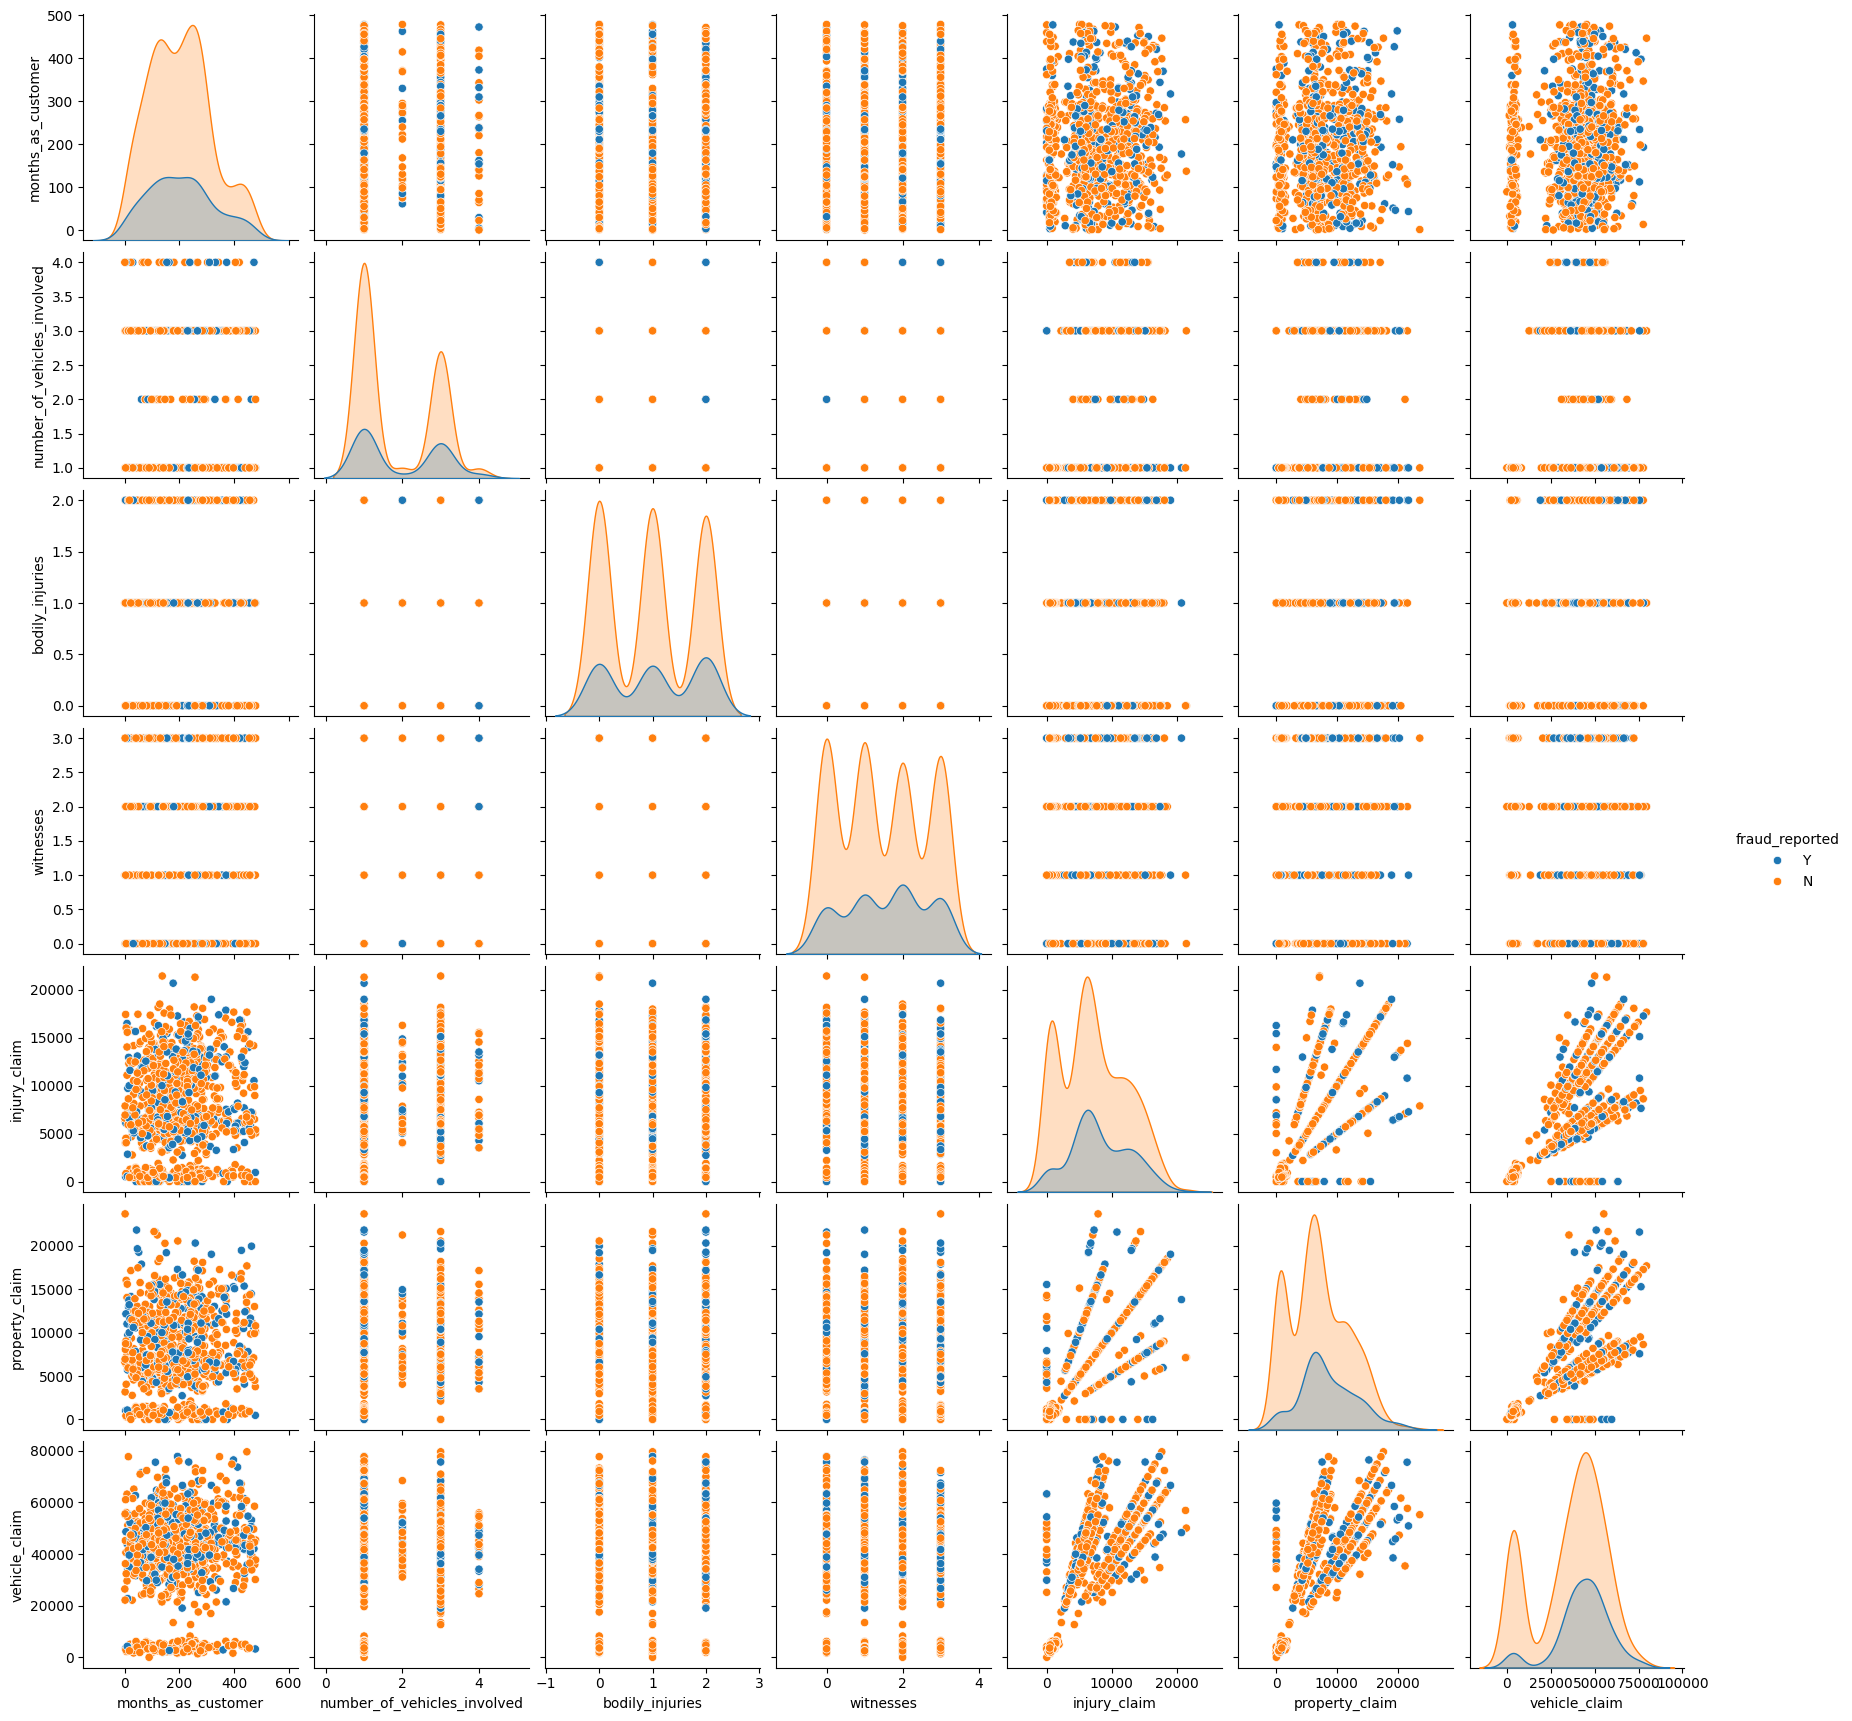

In [69]:
sns.pairplot(num_df,hue='fraud_reported')

In [71]:
X=final_df.iloc[:,:-1]
y=final_df['fraud_reported']

In [84]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [74]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

<Axes: xlabel='fraud_reported', ylabel='count'>

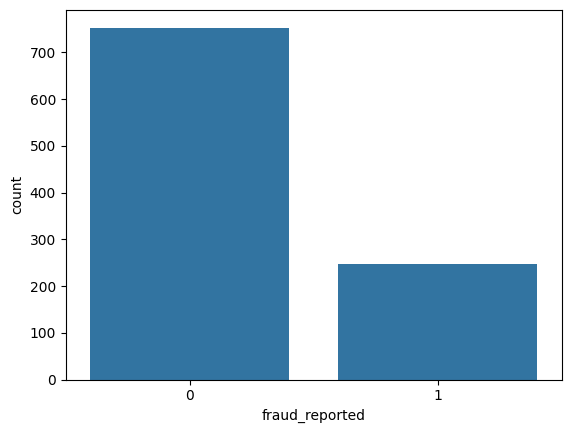

In [76]:
sns.countplot(x=final_df['fraud_reported'])

In [77]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [82]:
y_train_resampled.value_counts()

fraud_reported
0    608
1    608
Name: count, dtype: int64

In [85]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)
X_validation_scaled = scaler.transform(X_validation)

In [86]:
#training the data with logistic Regression
clf = LogisticRegression()
clf.fit(X_train_scaled, y_train_resampled)
y_pred = clf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.84


In [87]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.92      0.88        66
           1       0.82      0.68      0.74        34

    accuracy                           0.84       100
   macro avg       0.83      0.80      0.81       100
weighted avg       0.84      0.84      0.84       100



In [88]:
#logistic regression with cross validation
clf2 = LogisticRegression()
kfold_validation= KFold(n_splits=5, shuffle=True, random_state=42)
results=cross_val_score(clf2,X_train_scaled, y_train_resampled,cv=kfold_validation)

print(results)
print(np.mean(results))

[0.90163934 0.88065844 0.8600823  0.88888889 0.89300412]
0.8848546178236525


In [89]:
#Decision tree without cross validation
decision_tree_model = DecisionTreeClassifier(max_features = None,random_state=42)
decision_tree_model.fit(X_train_resampled, y_train_resampled)

y_pred_dt = decision_tree_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

Decision Tree Accuracy: 0.76


In [90]:
report = classification_report(y_test, y_pred_dt)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82        66
           1       0.65      0.65      0.65        34

    accuracy                           0.76       100
   macro avg       0.73      0.73      0.73       100
weighted avg       0.76      0.76      0.76       100



In [91]:
#Decision tree with cross validation
decision_tree_model = DecisionTreeClassifier(max_features = None)
kfold_val_dt= KFold(n_splits=5, shuffle=True, random_state=42)
rlts=cross_val_score(decision_tree_model,X_train_resampled, y_train_resampled,cv=kfold_val_dt)
#clf.fit(X_train_resampled, y_train_resampled)

print(rlts)
print(np.mean(rlts))

[0.84016393 0.83127572 0.81893004 0.82716049 0.8436214 ]
0.8322303177494434


In [55]:
y_pred_dt_cv = cross_val_predict(decision_tree_model, X_train_resampled, y_train_resampled, cv=kfold_validation)
report = classification_report(y_train_resampled, y_pred_dt_cv)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       608
           1       0.82      0.85      0.84       608

    accuracy                           0.83      1216
   macro avg       0.83      0.83      0.83      1216
weighted avg       0.83      0.83      0.83      1216



In [94]:
#Random Forest without Cross validation
random_forest_model = RandomForestClassifier(random_state=42,max_samples=0.8,max_features=None)
random_forest_model.fit(X_train_resampled, y_train_resampled)
y_pred_random_forest = random_forest_model.predict(X_test)

accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
print("Random Forest Accuracy:", accuracy_random_forest)

Random Forest Accuracy: 0.84


In [57]:
report = classification_report(y_test, y_pred_random_forest)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88        66
           1       0.78      0.74      0.76        34

    accuracy                           0.84       100
   macro avg       0.82      0.81      0.82       100
weighted avg       0.84      0.84      0.84       100



In [58]:
#Random Forest with Cross validation
random_forest_model2 = RandomForestClassifier(random_state=42,max_samples=0.8,max_features=None)
kfold_val_rf= KFold(n_splits=5, shuffle=True, random_state=42)
rls=cross_val_score(random_forest_model2,X_train_resampled, y_train_resampled,cv=kfold_val_rf)
#clf.fit(X_train_resampled, y_train_resampled)

print(rls)
print(np.mean(rls))

[0.91803279 0.85596708 0.86831276 0.88888889 0.85185185]
0.8766106726033867


In [59]:
y_pred_rf_cv = cross_val_predict(random_forest_model, X_train_resampled, y_train_resampled, cv=kfold_val_rf)
report = classification_report(y_train_resampled, y_pred_rf_cv)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.87      0.88       608
           1       0.87      0.89      0.88       608

    accuracy                           0.88      1216
   macro avg       0.88      0.88      0.88      1216
weighted avg       0.88      0.88      0.88      1216



In [60]:
#XGB without Cross validation
model = xgb.XGBClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=3,
    objective='binary:logistic',
    random_state=42
)
model.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [61]:
y_predxgb= model.predict(X_test)
accuracy = accuracy_score(y_test, y_predxgb)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.84


In [62]:
#XGB with Cross validation
xgb_model = xgb.XGBClassifier(random_state=42,max_depth=3,learning_rate=0.1,objective='binary:logistic',n_estimators=100)
kfold_val_xgb= KFold(n_splits=5, shuffle=True, random_state=42)
output=cross_val_score(xgb_model,X_train_resampled, y_train_resampled,cv=kfold_val_xgb)
#clf.fit(X_train_resampled, y_train_resampled)

print(output)
print(np.mean(output))

[0.8852459  0.86831276 0.88065844 0.88065844 0.85596708]
0.8741685218916547


**Hyperparameter Tuning**

In [ ]:
#Hyperparameter tuning for non-Linear Models with Grid Search CV
models = {
    'tree': (DecisionTreeClassifier(), {
        'max_depth': [2, 3, 4, 5, 6, 7],
        'min_samples_leaf': [2, 3, 6, 10]
    }),
    'forest': (RandomForestClassifier(), {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'min_samples_leaf': [2,5, 7, 10]
    }),
    'xgb': (XGBClassifier(), {
        'n_estimators': [50, 100, 200],
        'max_depth': [2, 3, 5],
        'min_samples_leaf': [3, 6, 10],
        'learning_rate': [0.01, 0.1],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0],
        'gamma': [0, 0.1],
        'alpha': [0, 0.1],
        'lambda': [0, 0.1]
    })
}

best_tree_models = {}

# Iterate through models and perform grid search for each
for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
    grid_search.fit(X_train_resampled, y_train_resampled)

    # Store the best model for each model type
    best_tree_models[model_name] = grid_search.best_estimator_


In [ ]:
best_tree_models[model_name]

XGBClassifier(alpha=0, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=0, learning_rate=0.01,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, min_samples_leaf=3, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50, ...)

In [ ]:
model_xgb_2 = xgb.XGBClassifier(
    learning_rate=0.1,
    reg_lambda=0.01,
    alpha=0,
    n_estimators=200,
    colsample_bytree=0.8,
    gamma=0,
    min_samples_leaf=3,
    max_depth=3,
    objective='binary:logistic',
    random_state=42
)
kfold_val_xgb= KFold(n_splits=5, shuffle=True, random_state=42)
output=cross_val_score(model_xgb_2,X_train_resampled, y_train_resampled,cv=kfold_val_xgb)
#clf.fit(X_train_resampled, y_train_resampled)

print(output)
print(np.mean(output))


[0.90163934 0.89300412 0.86831276 0.89300412 0.86419753]
0.8840315725561629


In [ ]:
#Hyperparameter tuning for linear models
models2 = {
    'logistic': (LogisticRegression(), {
        'C': np.logspace(-3, 6, 12),
        'penalty': ['l1', 'l2']
    })
}

best_linear_models = {}

# Iterate through models and perform grid search for each
for model_name2, (model2, param_grid2) in models2.items():
    grid_search = GridSearchCV(estimator=model2, param_grid=param_grid2, cv=5)
    grid_search.fit(X_train_scaled, y_train_resampled)

    # Store the best model for each model type
    best_linear_models[model_name2] = grid_search.best_estimator_

In [ ]:
best_linear_models[model_name2]

LogisticRegression(C=0.04328761281083059)

In [ ]:
tree_predictions = best_tree_models[model_name].predict(X_validation)
linear_predictions = best_linear_models[model_name2].predict(X_validation)

# Calculate accuracy for each model
tree_accuracy = accuracy_score(y_validation, tree_predictions)
linear_accuracy = accuracy_score(y_validation, linear_predictions)

# Compare the accuracy of both models
if tree_accuracy > linear_accuracy:
    best_model = best_tree_models[model_name]
    print("The best model is the tree model with accuracy:", tree_accuracy)
else:
    best_model = best_linear_models[model_name2]
    print("The best model is the linear model with accuracy:", linear_accuracy)

The best model is the tree model with accuracy: 0.81


In [ ]:
#Hyperparameter tuning with Randomized search CV
from sklearn.model_selection import RandomizedSearchCV
param_grids = {
    'tree': {
        'max_depth': [2, 3, 4, 5, 6, 7],
        'min_samples_leaf': [2, 3, 6, 10]
    },
    'forest': {
        'n_estimators': [10, 20, 50, 100, 200],
        'max_depth': [2, 3, 4, 5, 6, 7],
        'min_samples_leaf': [2, 3, 6, 10]
    },
    'xgb': {
        'n_estimators': [30, 50, 100, 200],
        'max_depth': [2, 3, 4, 5, 6, 7],
        'min_samples_leaf': [2, 3, 6, 10],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0],
        'gamma': [0, 0.1, 0.2],
        'alpha': [0, 0.1, 0.2],
        'lambda': [0, 0.1, 0.2]
    }
}

best_tree_models = {}

# Iterate through models and perform randomized search for each
for model_name, param_grid in param_grids.items():
    if model_name == 'tree':
        model = DecisionTreeClassifier()
    elif model_name == 'forest':
        model = RandomForestClassifier()
    elif model_name == 'xgb':
        model = XGBClassifier()

    randomized_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, cv=5)
    randomized_search.fit(X_train_resampled, y_train_resampled)

    # Store the best model for each model type
    best_tree_models[model_name] = randomized_search.best_estimator_


In [ ]:
best_tree_models[model_name]

XGBClassifier(alpha=0, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=0.1, learning_rate=0.2,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, min_samples_leaf=6, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100, ...)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

model_performance = {}

for model_name, best_model in best_tree_models.items():
    y_pred = best_model.predict(X_validation)

    accuracy = accuracy_score(y_validation, y_pred)
    precision = precision_score(y_validation, y_pred)
    recall = recall_score(y_validation, y_pred)
    f1 = f1_score(y_validation, y_pred)

    if model_name == 'xgb':
        # For XGBoost, you can also calculate ROC AUC
        y_pred_proba = best_model.predict_proba(X_validation)[:, 1]
        roc_auc = roc_auc_score(y_validation, y_pred_proba)
        model_performance[model_name] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'ROC AUC': roc_auc
        }
    else:
        model_performance[model_name] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1
        }

# Print the performance of each model
for model_name, metrics in model_performance.items():
    print(f"Model: {model_name}")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")
    print("\n")

Model: tree
Accuracy: 0.8100
Precision: 0.5278
Recall: 0.9048
F1-Score: 0.6667


Model: forest
Accuracy: 0.7800
Precision: 0.4815
Recall: 0.6190
F1-Score: 0.5417


Model: xgb
Accuracy: 0.8000
Precision: 0.5200
Recall: 0.6190
F1-Score: 0.5652
ROC AUC: 0.8186




In [64]:
#XGB Model after hyperparameter tuning
model_xgb_2 = xgb.XGBClassifier(
    learning_rate=0.2,
    reg_lambda=0.1,
    alpha=0.1,
    n_estimators=200,
    colsample_bytree=0.8,
    gamma=0.1,
    min_samples_leaf=3,
    max_depth=3,
    objective='binary:logistic',
    random_state=42
)
kfold_val_xgb= KFold(n_splits=5, shuffle=True, random_state=42)
output=cross_val_score(model_xgb_2,X_train_resampled, y_train_resampled,cv=kfold_val_xgb)
#clf.fit(X_train_resampled, y_train_resampled)

print(output)
print(np.mean(output))


[0.90163934 0.88888889 0.86419753 0.89300412 0.88065844]
0.885677663091142


In [63]:
!pip install scikeras

In [ ]:
#feed forward neural network without cross validation
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

model = keras.Sequential([
    keras.layers.Input(shape=(X_train_scaled.shape[1],)),  # Input layer
    keras.layers.Dense(150, activation='relu'),  # 1st hidden layer
    keras.layers.Dense(70, activation='relu'), # 2nd hidden layer
    #keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')   # Output layer (for binary classification)
])

model.compile(loss='binary_crossentropy',  # Use binary cross-entropy for binary classification
              optimizer='adam',           # You can use other optimizers like SGD, RMSprop, etc.
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train_resampled, epochs=10, batch_size=32)

predictions = model.predict(X_test_scaled)

Epoch 1/10
38/38 [==============================] - 2s 7ms/step - loss: 0.5102 - accuracy: 0.7673
Epoch 2/10
38/38 [==============================] - 0s 8ms/step - loss: 0.2815 - accuracy: 0.8939
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: 0.2184 - accuracy: 0.9161
Epoch 4/10
38/38 [==============================] - 0s 10ms/step - loss: 0.1843 - accuracy: 0.9252
Epoch 5/10
38/38 [==============================] - 0s 7ms/step - loss: 0.1618 - accuracy: 0.9359
Epoch 6/10
38/38 [==============================] - 0s 7ms/step - loss: 0.1444 - accuracy: 0.9441
Epoch 7/10
38/38 [==============================] - 0s 8ms/step - loss: 0.1274 - accuracy: 0.9515
Epoch 8/10
38/38 [==============================] - 0s 7ms/step - loss: 0.1151 - accuracy: 0.9572
Epoch 9/10
38/38 [==============================] - 0s 9ms/step - loss: 0.0966 - accuracy: 0.9679
Epoch 10/10
4/4 [==============================] - 0s 3ms/step


In [ ]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)

# Print the test accuracy
print("Test accuracy:", test_accuracy)

4/4 [==============================] - 0s 5ms/step - loss: 0.6009 - accuracy: 0.8200
Test accuracy: 0.8199999928474426


In [ ]:
#feed forward neural network with cross validation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# Define your neural network as a function
def create_model():
    model = Sequential()
    model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Create a KerasClassifier
nn_model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=32, verbose=0)

# Use cross_val_score for cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
results = cross_val_score(nn_model, X_train_scaled, y_train_resampled, cv=kfold)

# Print the results
print(f"Accuracy: {results.mean():.2f} (+/- {results.std():.2f})")

Accuracy: 0.88 (+/- 0.04)


In [ ]:
nn_model.fit(X_train_scaled, y_train_resampled, epochs=10, batch_size=32, verbose=0)
test_accuracy = nn_model.score(X_test_scaled, y_test)  # Assuming you have X_test_scaled and y_test
print(f"Test Accuracy: {test_accuracy:.2f}")

Test Accuracy: 0.79


In [ ]:
#hyperparameter tuning with grid search cv
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(60, 30, 15), (60, 60, 60), (120, 90, 60, 30, 15), (170, 150, 120, 90, 60, 30, 15)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.01, 0.1],
    'max_iter': [100, 200, 300],  # Specify a range of values
}

# Create an MLPClassifier instance
mlp = MLPClassifier()

# Create a GridSearchCV instance
grid_search = GridSearchCV(mlp, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to your data
grid_search.fit(X_train_scaled, y_train_resampled)

# Print the best parameters and results
print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))

Best: 0.868596 using {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (120, 90, 60, 30, 15), 'max_iter': 100, 'solver': 'sgd'}


In [73]:
#Neural Network model after Hyperparameter tuning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.callbacks import EarlyStopping

architecture = [150,130, 100, 70, 40, 20]
model_ht2 = keras.Sequential()  # Create a sequential model
# Iterate through the architecture list to add layers
for units in architecture:
    model_ht2.add(keras.layers.Dense(units, activation='tanh'))
# Output layer for binary classification
model_ht2.add(keras.layers.Dense(1, activation='sigmoid'))

model_ht2.compile(loss='binary_crossentropy',  # Use binary cross-entropy for binary classification
              optimizer='sgd',           # You can use other optimizers like SGD, RMSprop, etc.
              metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
model_ht2.fit(X_train_scaled, y_train_resampled, epochs=1000, batch_size=32,
          validation_data=(X_validation_scaled, y_validation), callbacks=[early_stopping])

predictions = model_ht2.predict(X_test_scaled)

Epoch 1/1000
38/38 [==============================] - 2s 11ms/step - loss: 0.5195 - accuracy: 0.7599 - val_loss: 0.5950 - val_accuracy: 0.6700
Epoch 2/1000
38/38 [==============================] - 0s 4ms/step - loss: 0.3893 - accuracy: 0.8577 - val_loss: 0.5221 - val_accuracy: 0.7600
Epoch 3/1000
38/38 [==============================] - 0s 4ms/step - loss: 0.3261 - accuracy: 0.8783 - val_loss: 0.4844 - val_accuracy: 0.7800
Epoch 4/1000
38/38 [==============================] - 0s 4ms/step - loss: 0.2920 - accuracy: 0.8840 - val_loss: 0.4640 - val_accuracy: 0.7900
Epoch 5/1000
38/38 [==============================] - 0s 4ms/step - loss: 0.2702 - accuracy: 0.8997 - val_loss: 0.4470 - val_accuracy: 0.8000
Epoch 6/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.2559 - accuracy: 0.9013 - val_loss: 0.4359 - val_accuracy: 0.8400
Epoch 7/1000
38/38 [==============================] - 0s 4ms/step - loss: 0.2442 - accuracy: 0.9038 - val_loss: 0.4295 - val_accuracy: 0.8400
Epoch

In [74]:
test_loss3, test_accuracy3 = model_ht2.evaluate(X_test_scaled, y_test)

# Print the test accuracy
print("Test accuracy:", test_accuracy3)

4/4 [==============================] - 0s 5ms/step - loss: 0.4351 - accuracy: 0.8800
Test accuracy: 0.8799999952316284


4/4 [==============================] - 0s 4ms/step


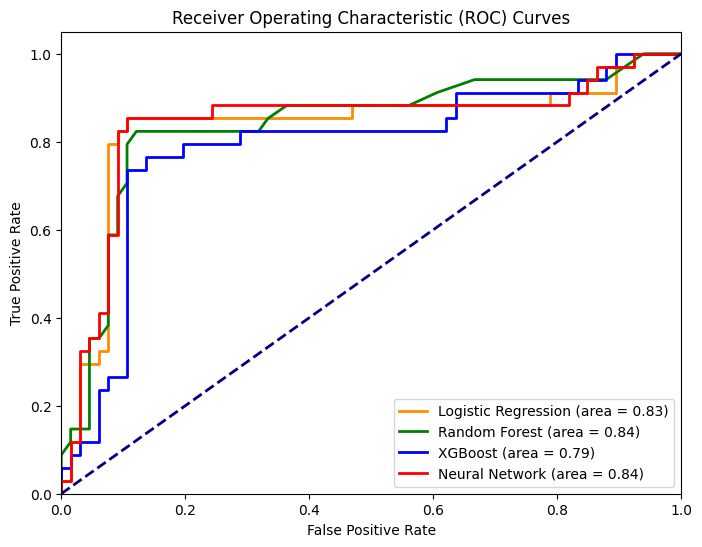

Logistic Regression AUC: 0.8333333333333334
Random Forest AUC: 0.839572192513369
XGBoost AUC: 0.7887700534759358
NN AUC: 0.8409090909090909


In [76]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for Logistic Regression, Random Forest, and XGBoost
predicted_probs_logreg = clf.predict_proba(X_test_scaled)[:, 1]
predicted_probs_rf = random_forest_model.predict_proba(X_test)[:, 1]
predicted_probs_xgb = model.predict_proba(X_test)[:, 1]

# For the Neural Network, use the `predict` method to get probabilities
predicted_probs_nn = model_ht2.predict(X_test_scaled)

# Calculate the ROC curve for each model
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, predicted_probs_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

fpr_rf, tpr_rf, _ = roc_curve(y_test, predicted_probs_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, predicted_probs_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

fpr_nn, tpr_nn, _ = roc_curve(y_test, predicted_probs_nn)
roc_auc_nn = auc(fpr_nn, tpr_nn)

# Plot the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, color='darkorange', lw=2, label='Logistic Regression (area = {:.2f})'.format(roc_auc_logreg))
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='Random Forest (area = {:.2f})'.format(roc_auc_rf))
plt.plot(fpr_xgb, tpr_xgb, color='blue', lw=2, label='XGBoost (area = {:.2f})'.format(roc_auc_xgb))
plt.plot(fpr_nn, tpr_nn, color='red', lw=2, label='Neural Network (area = {:.2f})'.format(roc_auc_nn))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()

print("Logistic Regression AUC:", roc_auc_logreg)
print("Random Forest AUC:", roc_auc_rf)
print("XGBoost AUC:", roc_auc_xgb)
print("NN AUC:", roc_auc_nn)